In [2]:
import math
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv('Datasets/cars.csv')
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65


In [4]:
for col in ['Mileage', 'Power', 'Engine']:
    data[col] = data[col].astype(str).str.split().str[0]
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84,1199.0,84.00,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49,1493.0,100.00,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.00,1598.0,103.52,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.50,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02,1248.0,88.76,5.0,2.65


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Location           5000 non-null   object 
 2   Year               5000 non-null   int64  
 3   Kilometers_Driven  5000 non-null   int64  
 4   Fuel_Type          5000 non-null   object 
 5   Transmission       5000 non-null   object 
 6   Owner_Type         5000 non-null   object 
 7   Mileage            4998 non-null   float64
 8   Engine             4966 non-null   float64
 9   Power              4877 non-null   float64
 10  Seats              4961 non-null   float64
 11  Price              5000 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 468.9+ KB


In [6]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5000.000000,5.000000e+03,4998.000000,4966.000000,4877.000000,4961.000000,5000.000000
mean,2013.343600,5.916074e+04,18.043994,1627.133105,113.811363,5.284015,9.567026
std,3.255589,9.900590e+04,4.499215,597.513864,53.321507,0.813547,11.190188
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.321200e+04,18.110000,1495.000000,98.600000,5.000000,5.700000
75%,2016.000000,7.300000e+04,20.890000,1991.000000,140.000000,5.000000,10.175000
max,2019.000000,6.500000e+06,28.400000,5461.000000,550.000000,10.000000,160.000000


In [7]:
num_cols = data.select_dtypes(include=('number')).columns
num_cols

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [8]:
# Cleaning data
clean_data = data.copy()
clean_data[num_cols] = clean_data[num_cols].replace('?', pd.NA).apply(pd.to_numeric)
clean_data.replace(-1, pd.NA, inplace=True)
clean_data.fillna(clean_data.mean(numeric_only=True), inplace=True)

In [9]:
# Removing Outliers
for col in num_cols:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    clean_data[col] = clean_data[col].astype(float)
    median = clean_data[col].median()
    clean_data.loc[(clean_data[col] < low) | (clean_data[col] > high), col] = median
clean_data[num_cols] = clean_data[num_cols].fillna(clean_data[num_cols].mean())


In [10]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Location           5000 non-null   object 
 2   Year               5000 non-null   float64
 3   Kilometers_Driven  5000 non-null   float64
 4   Fuel_Type          5000 non-null   object 
 5   Transmission       5000 non-null   object 
 6   Owner_Type         5000 non-null   object 
 7   Mileage            5000 non-null   float64
 8   Engine             5000 non-null   float64
 9   Power              5000 non-null   float64
 10  Seats              5000 non-null   float64
 11  Price              5000 non-null   float64
dtypes: float64(7), object(5)
memory usage: 468.9+ KB


In [12]:
def one_hot_encode(df, col):
    df_encoded = df.copy()
    df_encoded = pd.get_dummies(df, columns=col, prefix=col, dtype=int)
    return df_encoded

In [13]:
def ordinal_encode(df, col_order_map):
    df_encoded = df.copy()
    for col, order in col_order_map.items():
        mapping = {c:i for i,c in enumerate(order)}
        df_encoded[col] = df_encoded[col].map(mapping)
    return df_encoded

In [14]:
def zscore_normalize_features(x, mean = None, std = None):
    if mean is None:
        mean = np.mean(x, axis=0)
    if std is None:
        std = np.std(x,axis=0)
    safe_std = np.where(std == 0, 1, std)
    x_norm = (x - mean)/safe_std
    return x_norm, mean, std

In [15]:
def compute_cost(x, y, w, b, lam):
    m = x.shape[0]
    y_prediction = np.dot(x, w) + b
    se = (y_prediction - y)**2
    cost = (1/(2*m))*(np.sum(se) + (lam*np.sum(w**2)))
    return cost

In [16]:
def compute_gradient(x, y, w, b, lam):
    m,n = x.shape
    y_prediction = np.dot(x, w) + b
    error = (y_prediction - y)
    dw = (1/m)*(np.dot(x.transpose(), error) + lam*w)
    db = (1/m)*np.sum(error)
    return dw, db

In [17]:
def gradient_descent(x, y, w_i, b_i, learning_rate, lam, epsilon=1e-6, max_iter=10000):
    i = 0
    w = copy.deepcopy(w_i)
    b = b_i
    prev_cost = float('inf')
    while True:
        dw, db = compute_gradient(x, y, w, b, lam) 
        gradient_norm = math.sqrt(np.sum(dw**2) + db**2)
        cost = compute_cost(x, y, w, b, lam)
        if (gradient_norm < epsilon ) or (abs(prev_cost - cost) < epsilon):
            break;
        if i >= max_iter:
            break;
        w -= learning_rate*dw
        b -= learning_rate*db
        if i % 100 == 0:
            print(f'Iteration {i}: Cost = {cost}')
        prev_cost = cost
        i += 1
    return w, b


In [18]:
def predict(x, w, b):
    prediction = np.dot(x, w) + b
    return prediction

In [19]:
am_price = clean_data.groupby('Transmission')['Price'].mean()
am_price

Transmission
Automatic    8.539595
Manual       5.194975
Name: Price, dtype: float64

In [20]:
fuel_price = clean_data.groupby('Fuel_Type')['Price'].mean()
fuel_price

Fuel_Type
Diesel       7.379362
Electric    12.875000
Petrol       4.746113
Name: Price, dtype: float64

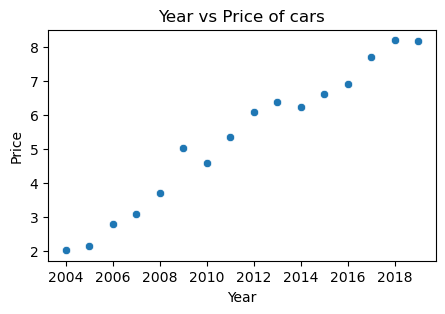

In [21]:
year_price = pd.DataFrame(clean_data.groupby('Year')['Price'].mean())
plt.figure(figsize=(5,3))
sns.scatterplot(x='Year', y='Price', data=year_price)
plt.title('Year vs Price of cars')
plt.show()

In [22]:
clean_data['Brand'] = clean_data['Name'].apply(lambda s: s.split()[0])

In [23]:
encoded_data = one_hot_encode(clean_data, col=['Location', 'Brand', 'Fuel_Type'])
encode_col = ['Owner_Type', 'Transmission']
col_order_map = {}
for col in encode_col:
    col_order_map[col] = clean_data[col].unique()
encoded_data = ordinal_encode(encoded_data, col_order_map)
encoded_data.head(3)


,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,...,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol
0,Tata Tiago 1.2 Revotron XZ WO Alloy,2017.0,16500.0,0,0,23.84,1199.0,84.00,5.0,5.00,...,0,0,0,1,0,0,0,0,0,1
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,2017.0,47357.0,1,0,18.49,1493.0,100.00,5.0,8.37,...,0,0,0,0,0,0,0,1,0,0
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,2014.0,35000.0,0,0,15.00,1598.0,103.52,5.0,4.50,...,0,1,0,0,0,0,0,0,0,1


In [24]:
x= encoded_data.drop(columns=['Price','Name'])
y = encoded_data['Price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_features = x.columns


In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
x_train_norm, mean, std = zscore_normalize_features(x_train_poly)
x_test_norm, _, _ = zscore_normalize_features(x_test_poly, mean, std)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [26]:
w_i = np.zeros(x_train_poly.shape[1])
b_i = 0
learning_rate = 0.06
lam = 0.1
w, b = gradient_descent(x_train_norm, y_train_log, w_i, b_i, learning_rate, lam)
final_cost = compute_cost(x_train_norm, y_train_log, w, b, lam)
print(final_cost)
print(w, b)

Iteration 0: Cost = 1.8188489366838754
Iteration 100: Cost = 0.030557950574907018
Iteration 200: Cost = 0.02902817831454935
Iteration 300: Cost = 0.028274952378621935
Iteration 400: Cost = 0.02779402632463908
Iteration 500: Cost = 0.027450792612002284
Iteration 600: Cost = 0.02719166556431969
Iteration 700: Cost = 0.026989050140394565
Iteration 800: Cost = 0.026826436837845347
Iteration 900: Cost = 0.026693107123629625
Iteration 1000: Cost = 0.02658176184385398
0.026567615665463045
[ 0.06432018 -0.01393264  0.03029999 ...  0.00245427  0.
 -0.01017523] 1.8382924474567992


In [27]:
y_pred_log = predict(x_test_norm, w, b)
prediction = np.expm1(y_pred_log)
print('Predicted prices:', prediction)
print('Actual values: ', y_test)

Predicted prices: [ 4.72854158  4.13618846  4.00102718 ...  2.90401505 11.68591476
  1.48905406]
Actual values:  [ 5.76  4.39  4.15 ...  2.9  10.2   1.5 ]


In [28]:
y_log_mean = y_test_log.mean()
ss_reg_log = np.sum((y_pred_log - y_log_mean) ** 2)
ss_total_log = np.sum((y_test_log - y_log_mean) ** 2)
R2_log = ss_reg_log / ss_total_log
print('R² score (log scale):', R2_log)


R² score (log scale): 0.8136416919665136


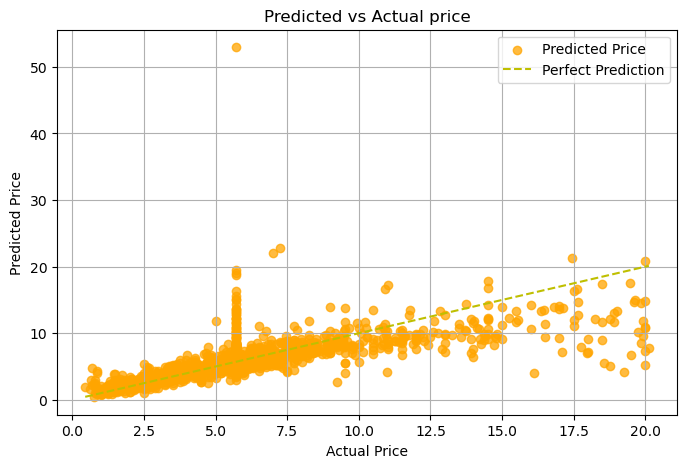

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, prediction, color='orange', alpha=0.75, label='Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'y--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual price')
plt.grid(True)
plt.legend()
plt.show()